In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd

/content


### Import

In [3]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import tensorflow
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image
import glob

from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

### Verify Image

In [ ]:
image_list = []
for filename in glob.glob('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/2/*.jpg'): 
    im = Image.open(filename)
    image_list.append(im)
    
print(image_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE9B110>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE64C50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE9B050>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE798D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE82910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD74AE3B090>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F5290>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F55D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F5750>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F5250>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F5050>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FD7C85F5AD0>, <PIL.JpegImagePlugin.JpegIm

In [ ]:
image_list_0 = np.array(image_list[0])
image_list_0.shape

(32, 32, 3)

### Load Dataset 1

In [4]:
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

datapath = Path('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32')
data_dir = sorted([x for x in datapath.iterdir()], key=lambda x: int(x.stem))
print(data_dir)

data = []
label = []

for dir_path in data_dir :
  for i , filename in enumerate(os.listdir(dir_path)):
    img = cv2.imread(os.path.join(dir_path,filename))
    img = cv2.resize(img, (32, 32))
    data.append(img)
    label.append([int(dir_path.stem)-2])

data2 = np.array(data)
data = np.array(data).astype(np.float32()) / 255.0
label = np.array(label).reshape(-1,1)

print("train",data.shape)
print("train_label",label.shape)
print("train",label.dtype)
train_X, test_X, train_y, test_y = train_test_split(data, label, train_size= 0.8)

[PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/2'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/3'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/4'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/5'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/6'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/7'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/8'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/9'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/10'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/C

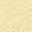

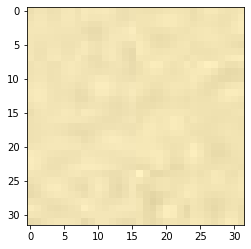

In [5]:
data2.shape
# print(data2[0])
# np.min(data2[0])
# plt.imshow(data2[0])
cv2_imshow(data2[0])
plt.imshow(cv2.cvtColor(data2[0], cv2.COLOR_BGR2RGB))

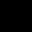

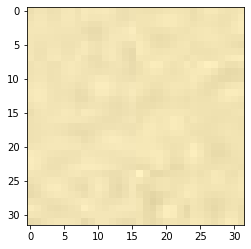

In [6]:
data.shape
# print(data[0])
# np.min(data)
# plt.imshow(data[0])
cv2_imshow(data[0])
plt.imshow(cv2.cvtColor(data[0], cv2.COLOR_BGR2RGB))

### Load Dataset 2

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

directory = '/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/'

train_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

val_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

Found 5869 files belonging to 11 classes.
Using 4696 files for training.
Found 5869 files belonging to 11 classes.
Using 1173 files for validation.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = sorted( train_ds.class_names, key = lambda x:int(x) )
print(class_names)

['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


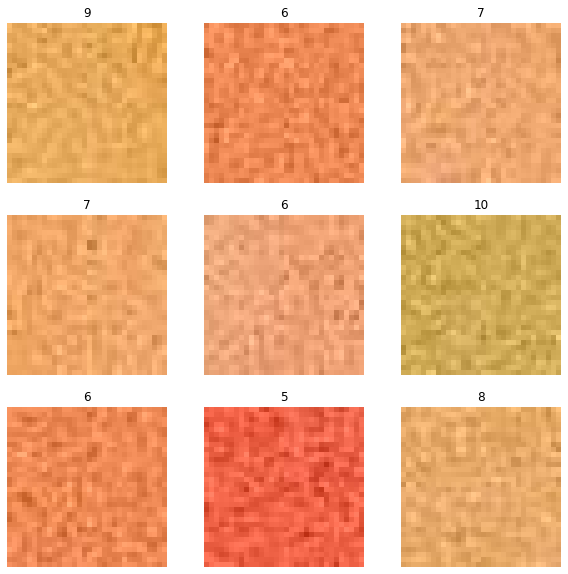

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
count = 0
for images, labels in train_ds.take(-1):
  count = count + 1 
  print(count)

**Train Data**

In [ ]:
train_ls = list(train_ds)

In [ ]:
len(train_ls)
# np.stack(train_np)
print(train_ls[0][0].shape)   

train_np_ds = train_ls[0][0]    # train_ls[0][0] : train data ;  train_ls[0][1] : train label
for i in range(1, len(train_ls)):
  train_np_ds = np.concatenate((train_ls[i][0], train_np_ds), axis=0)
train_np_ds.shape

(32, 32, 32, 3)


(4696, 32, 32, 3)

In [ ]:
# print(train_np_ds[0])
# plt.imshow(int(train_np_ds[0]))

**Train Label**

In [ ]:
train_np_label_ds = train_ls[0][1]    
for i in range(1, len(train_ls)):
  train_np_label_ds = np.concatenate((train_ls[i][1], train_np_label_ds), axis=0)
# train_np_label_ds.shape

In [ ]:
train_np_label_ds = train_np_label_ds.reshape(train_np_label_ds.shape[0], 1)
train_np_label_ds.shape

(4696, 1)

**Split VAL & Test Data**

In [ ]:
val_ls = list(val_ds)

In [ ]:
val_np_ds = val_ls[0][0]
for i in range(1, len(val_ls)):
  val_np_ds = np.concatenate((val_ls[i][0], val_np_ds), axis=0)
val_np_ds.shape

n = len(val_np_ds)//2
test_np_ds = val_np_ds[n:]
val_np_ds = val_np_ds[:n]

In [ ]:
print(val_np_ds.shape, test_np_ds.shape)

(586, 32, 32, 3) (587, 32, 32, 3)


**Split VAL & Test Label**

In [ ]:
val_np_label_ds = val_ls[0][1]
for i in range(1, len(val_ls)):
  val_np_label_ds = np.concatenate((val_ls[i][1], val_np_label_ds), axis=0)
val_np_label_ds.shape

n = len(val_np_label_ds)//2
test_np_label_ds = val_np_label_ds[n:]
val_np_label_ds = val_np_label_ds[:n]

In [ ]:
val_np_label_ds = val_np_label_ds.reshape(val_np_label_ds.shape[0], 1)
test_np_label_ds = test_np_label_ds.reshape(test_np_label_ds.shape[0], 1)
print(val_np_label_ds.shape, test_np_label_ds.shape)

(586, 1) (587, 1)


In [ ]:
train_X_2 = train_np_ds
train_ground = train_np_ds

valid_X_2 = val_np_ds
valid_ground = val_np_ds

In [ ]:
train_X_2.dtype, valid_X_2.dtype
np.max(train_X_2), np.max(valid_X_2)
train_X_2 = train_X_2 / np.max(train_X_2)
valid_X_2 = valid_X_2 / np.max(valid_X_2)
np.max(train_X_2), np.max(valid_X_2)

(1.0, 1.0)

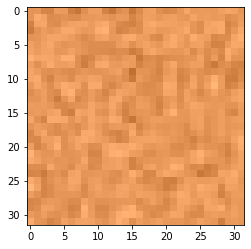

In [ ]:
plt.imshow(train_X_2[0])

## AutoEncoder

### AutoEncoder Model

#### AE1

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #16 x 16 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #8 x 8 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #8 x 8 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 3
    return decoded

#### AE2_encode ONE dim

In [ ]:
def encoder2(input_img):

    encoding_dim = 1

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)

    return encoder_output

def decoder2(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    # conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2) #32 x 32 x 3
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

#### AE2_encode Two dim

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='tanh', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='tanh', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='tanh', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='tanh', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='tanh', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='tanh', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

### Training Model

In [ ]:
batch_size = 32
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

In [ ]:
autoencoder = Model(input_img, decoder3(encoder3(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=1e-3))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(learning_rate=1e-3))

(None, 2)
(None, 32, 32, 3)


In [ ]:
encoder_bottleneck = Model(input_img, encoder3(input_img))

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256   

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_X, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

# autoencoder_train = autoencoder.fit(train_X_2, train_X_2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_2, valid_X_2))

Epoch 1/50
115/115 [==============================] - 14s 12ms/step - loss: 0.9225 - val_loss: 0.3549
Epoch 2/50
115/115 [==============================] - 1s 9ms/step - loss: 0.5503 - val_loss: 0.4436
Epoch 3/50
115/115 [==============================] - 1s 9ms/step - loss: 0.3936 - val_loss: 0.2562
Epoch 4/50
115/115 [==============================] - 1s 9ms/step - loss: 0.2810 - val_loss: 0.2098
Epoch 5/50
115/115 [==============================] - 1s 9ms/step - loss: 0.1982 - val_loss: 0.1958
Epoch 6/50
115/115 [==============================] - 1s 9ms/step - loss: 0.1385 - val_loss: 0.3031
Epoch 7/50
115/115 [==============================] - 1s 9ms/step - loss: 0.0921 - val_loss: 0.2422
Epoch 8/50
115/115 [==============================] - 1s 9ms/step - loss: 0.0626 - val_loss: 0.2422
Epoch 9/50
115/115 [==============================] - 1s 9ms/step - loss: 0.0420 - val_loss: 0.2002
Epoch 10/50
115/115 [==============================] - 1s 9ms/step - loss: 0.0273 - val_loss: 0.09

### Save model

In [ ]:
from google.colab import files
import joblib

In [ ]:
autoencoder.save("/content/LPE_AE_2.h5")
files.download('/content/LPE_AE_2.h5')

joblib.dump(autoencoder_train, '/content/LPE_AE_train_history_2')
files.download('/content/LPE_AE_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
encoder_bottleneck.save("/content/LPE_AE_bottle_twodim.h5")
files.download('/content/LPE_AE_bottle_twodim.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE model

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [9]:
autoencoder = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_AE_2.h5')
autoencoder_train = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_AE_train_history_2')
encoder_bottleneck = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_AE_bottle_twodim.h5')

### Evaluate model

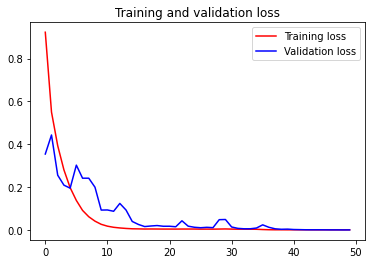

In [10]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
for i, value in enumerate(test_X):
  pre_img = autoencoder.predict(test_X[i:i+1])
  print(mse(test_X[i:i+1], pre_img).numpy())

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
print(mse(train_X[1:2], pre_img).numpy())

0.07562091


In [ ]:
test_y[0]

array([2])

In [ ]:
test_np_label_ds_reshape= test_y.reshape(-1)
test_np_label_ds_reshape

array([ 2, 10,  4, ...,  9,  2,  7])

In [ ]:
test_X.shape

(1144, 32, 32, 3)

**Bottle neck info**

In [ ]:
encoded_imgs = encoder_bottleneck.predict(test_X)

In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(encoded_imgs, test_y):
  # print(l.shape)
  if l[0] == 0:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 1:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 2:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 7:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 9:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class12.append([t[0], t[1], l[0]])


print('ph 2 : ')
print("mean:", np.mean(np.array(class2)[:,:2]))
print("srd:", np.std(np.array(class2)[:,:2]))
# print(class2)

print('-------------------')
print('ph 3 : ')
print("mean:", np.mean(np.array(class3)[:,:2]))
print("srd:", np.std(np.array(class3)[:,:2]))
# print(class3)

print('-------------------')
print('ph 4 : ')
print("mean:", np.mean(np.array(class4)[:,:2]))
print("srd:", np.std(np.array(class4)[:,:2]))
# print(class4)

print('-------------------')
print('ph 5 : ')
print("mean:", np.mean(np.array(class5)[:,:2]))
print("srd:", np.std(np.array(class5)[:,:2]))
# print(class5)

print('-------------------')
print('ph 6 : ')
print("mean:", np.mean(np.array(class6)[:,:2]))
print("srd:", np.std(np.array(class6)[:,:2]))
# print(class6)

print('-------------------')
print('ph 7 : ')
print("mean:", np.mean(np.array(class7)[:,:2]))
print("srd:", np.std(np.array(class7)[:,:2]))
# print(class7)

print('-------------------')
print('ph 8 : ')
print("mean:", np.mean(np.array(class8)[:,:2]))
print("srd:", np.std(np.array(class8)[:,:2]))
# print(class8)

print('-------------------')
print('ph 9 : ')
print("mean:", np.mean(np.array(class9)[:,:2]))
print("srd:", np.std(np.array(class9)[:,:2]))
# print(class9)

print('-------------------')
print('ph 10 : ')
print("mean:", np.mean(np.array(class10)[:,:2]))
print("srd:", np.std(np.array(class10)[:,:2]))
# print(class10)

print('-------------------')
print('ph 11 : ')
print("mean:", np.mean(np.array(class11)[:,:2]))
print("srd:", np.std(np.array(class11)[:,:2]))
# print(class11)

print('-------------------')
print('ph 12 : ')
print("mean:", np.mean(np.array(class12)[:,:2]))
print("srd:", np.std(np.array(class12)[:,:2]))
# print(class12)

ph 2 : 
mean: -13.34736051561015
srd: 15.182632534179213
-------------------
ph 3 : 
mean: 4.8384600496729435
srd: 3.131210544802348
-------------------
ph 4 : 
mean: 7.623539763827656
srd: 3.35539207160168
-------------------
ph 5 : 
mean: 6.730019330864354
srd: 5.7375179228318
-------------------
ph 6 : 
mean: 4.494366415714224
srd: 5.911792287938415
-------------------
ph 7 : 
mean: 1.0071350406574946
srd: 10.16553517722628
-------------------
ph 8 : 
mean: -3.9697493942661417
srd: 2.5155547543544423
-------------------
ph 9 : 
mean: -2.9448628908543437
srd: 8.800611517272419
-------------------
ph 10 : 
mean: 0.4156797497787259
srd: 11.042411493837568
-------------------
ph 11 : 
mean: 2.698257937170565
srd: 10.646936146444165
-------------------
ph 12 : 
mean: -24.171557719508808
srd: 10.168983084120498


In [ ]:
encoded_imgs[0]

array([-11.339448,   4.21279 ], dtype=float32)

PLOT

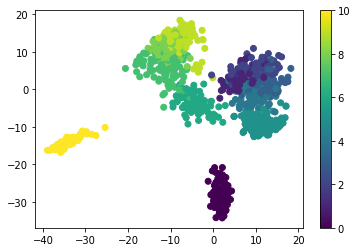

In [ ]:
# plotting
# encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c = test_y)
plt.colorbar()
plt.show()

### AE Decode Image (Predict) 

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
# AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/12/ph12_3.jpg")
# AE_image_crop_test_ph11 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/11/ph11_3.jpg")
# AE_image_crop_test_ph10 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/10/ph10_3.jpg")
# AE_image_crop_test_ph9 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/9/ph9_3.jpg")
# AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/8/ph8_3.jpg")
# AE_image_crop_test_ph7 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/7/ph7_3.jpg")
# AE_image_crop_test_ph6 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/6/ph6_3.jpg")
# AE_image_crop_test_ph5 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/5/ph5_3.jpg")
# AE_image_crop_test_ph4 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/4/ph4_3.jpg")
# AE_image_crop_test_ph3 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/3/ph3_3.jpg")
# AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/2/ph2_3.jpg")

AE_image_crop_test_ph12 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/12/ph12_3.jpg")
AE_image_crop_test_ph11 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/11/ph11_3.jpg")
AE_image_crop_test_ph10 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/10/ph10_3.jpg")
AE_image_crop_test_ph9 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/9/ph9_3.jpg")
AE_image_crop_test_ph8 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/8/ph8_3.jpg")
AE_image_crop_test_ph7 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/7/ph7_3.jpg")
AE_image_crop_test_ph6 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/6/ph6_3.jpg")
AE_image_crop_test_ph5 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/5/ph5_3.jpg")
AE_image_crop_test_ph4 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/4/ph4_3.jpg")
AE_image_crop_test_ph3 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/3/ph3_3.jpg")
AE_image_crop_test_ph2 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_32*32/2/ph2_3.jpg")

(1, 32, 32, 3)


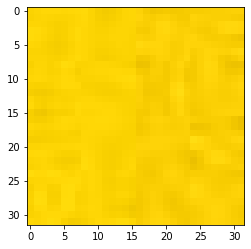

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph12, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

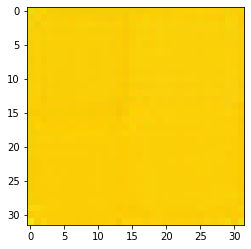

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph12 = encoder_bottleneck.predict(np_AE_image_crop_test_ph12_norm)
print(bottleneck_ph12)

[[-0.2060631   0.31591508]]


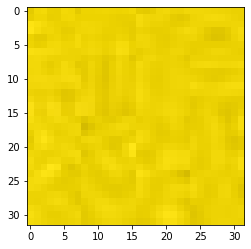

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph11, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph11 = np.array(AE_image_crop_test_ph11)
np_AE_image_crop_test_ph11 = np_AE_image_crop_test_ph11.reshape(1, 32, 32, 3)

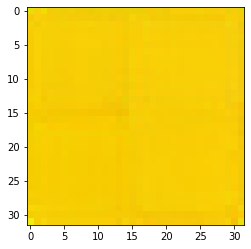

In [ ]:
np_AE_image_crop_test_ph11_norm = np_AE_image_crop_test_ph11 / 255

AE_test_ph11 = autoencoder.predict(np_AE_image_crop_test_ph11_norm)

# print(AE_test_ph12)
AE_test_ph11 = AE_test_ph11.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph11, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph11 = encoder_bottleneck.predict(np_AE_image_crop_test_ph11_norm)
print(bottleneck_ph11)

[[-0.21685185  0.3089305 ]]


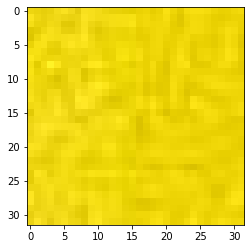

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph10, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph10 = np.array(AE_image_crop_test_ph10)
np_AE_image_crop_test_ph10 = np_AE_image_crop_test_ph10.reshape(1, 32, 32, 3)

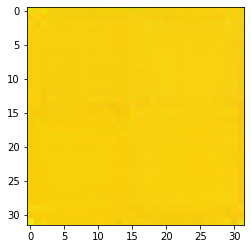

In [ ]:
np_AE_image_crop_test_ph10_norm = np_AE_image_crop_test_ph10 / 255

AE_test_ph10 = autoencoder.predict(np_AE_image_crop_test_ph10_norm)

# print(AE_test_ph12)
AE_test_ph10 = AE_test_ph10.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph10, cv2.COLOR_BGR2RGB))


In [ ]:
bottleneck_ph10 = encoder_bottleneck.predict(np_AE_image_crop_test_ph10_norm)
print(bottleneck_ph10)

[[-0.22693263  0.3116385 ]]


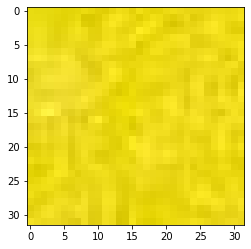

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph9, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph9 = np.array(AE_image_crop_test_ph9)
np_AE_image_crop_test_ph9 = np_AE_image_crop_test_ph9.reshape(1, 32, 32, 3)

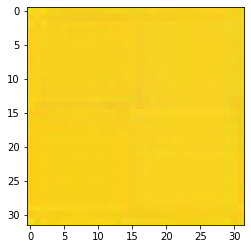

In [ ]:
np_AE_image_crop_test_ph9_norm = np_AE_image_crop_test_ph9 / 255

AE_test_ph9 = autoencoder.predict(np_AE_image_crop_test_ph9_norm)

# print(AE_test_ph12)
AE_test_ph9 = AE_test_ph9.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph9, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph9 = encoder_bottleneck.predict(np_AE_image_crop_test_ph9_norm)
print(bottleneck_ph9)

[[-0.23366116  0.3186833 ]]


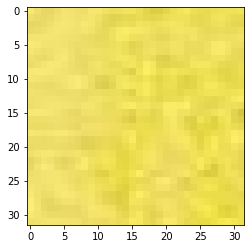

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph8, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph8 = np.array(AE_image_crop_test_ph8)
np_AE_image_crop_test_ph8 = np_AE_image_crop_test_ph8.reshape(1, 32, 32, 3)

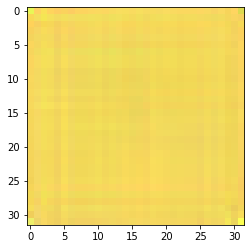

In [ ]:
np_AE_image_crop_test_ph8_norm = np_AE_image_crop_test_ph8 / 255

AE_test_ph8 = autoencoder.predict(np_AE_image_crop_test_ph8_norm)

# print(AE_test_ph12)
AE_test_ph8 = AE_test_ph8.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph8, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph8 = encoder_bottleneck.predict(np_AE_image_crop_test_ph8_norm)
print(bottleneck_ph8)

[[-0.2697071   0.36126184]]


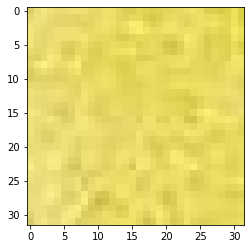

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph7, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph7 = np.array(AE_image_crop_test_ph7)
np_AE_image_crop_test_ph7 = np_AE_image_crop_test_ph7.reshape(1, 32, 32, 3)

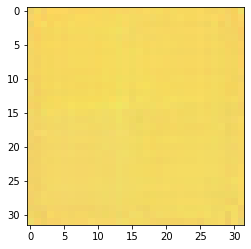

In [ ]:
np_AE_image_crop_test_ph7_norm = np_AE_image_crop_test_ph7 / 255

AE_test_ph7 = autoencoder.predict(np_AE_image_crop_test_ph7_norm)

# print(AE_test_ph12)
AE_test_ph7 = AE_test_ph7.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph7, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph7 = encoder_bottleneck.predict(np_AE_image_crop_test_ph7_norm)
print(bottleneck_ph7)

[[-0.27689382  0.3611718 ]]


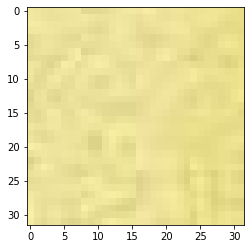

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph6, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph6 = np.array(AE_image_crop_test_ph6)
np_AE_image_crop_test_ph6 = np_AE_image_crop_test_ph6.reshape(1, 32, 32, 3)

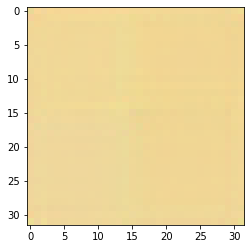

In [ ]:
np_AE_image_crop_test_ph6_norm = np_AE_image_crop_test_ph6 / 255

AE_test_ph6 = autoencoder.predict(np_AE_image_crop_test_ph6_norm)

# print(AE_test_ph12)
AE_test_ph6 = AE_test_ph6.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph6, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph6 = encoder_bottleneck.predict(np_AE_image_crop_test_ph6_norm)
print(bottleneck_ph6)

[[-0.30415496  0.382039  ]]


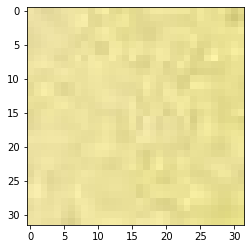

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph5, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph5 = np.array(AE_image_crop_test_ph5)
np_AE_image_crop_test_ph5 = np_AE_image_crop_test_ph5.reshape(1, 32, 32, 3)

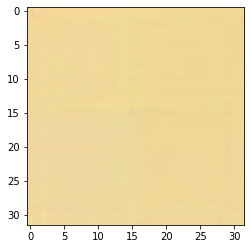

In [ ]:
np_AE_image_crop_test_ph5_norm = np_AE_image_crop_test_ph5 / 255

AE_test_ph5 = autoencoder.predict(np_AE_image_crop_test_ph5_norm)

# print(AE_test_ph12)
AE_test_ph5 = AE_test_ph5.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph5, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph5 = encoder_bottleneck.predict(np_AE_image_crop_test_ph5_norm)
print(bottleneck_ph5)

[[-0.30473617  0.3847029 ]]


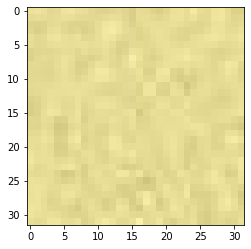

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph4, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph4 = np.array(AE_image_crop_test_ph4)
np_AE_image_crop_test_ph4 = np_AE_image_crop_test_ph4.reshape(1, 32, 32, 3)

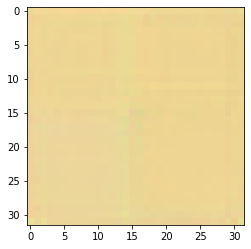

In [ ]:
np_AE_image_crop_test_ph4_norm = np_AE_image_crop_test_ph4 / 255

AE_test_ph4 = autoencoder.predict(np_AE_image_crop_test_ph4_norm)

# print(AE_test_ph12)
AE_test_ph4 = AE_test_ph4.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph4, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph4 = encoder_bottleneck.predict(np_AE_image_crop_test_ph4_norm)
print(bottleneck_ph4)

[[-0.30104032  0.38127324]]


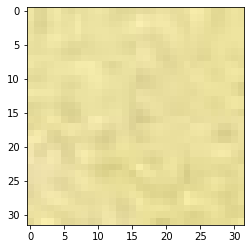

In [ ]:

# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph3, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph3 = np.array(AE_image_crop_test_ph3)
np_AE_image_crop_test_ph3 = np_AE_image_crop_test_ph3.reshape(1, 32, 32, 3)

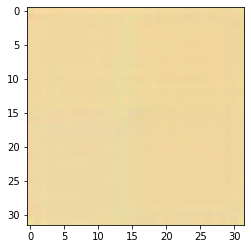

In [ ]:
np_AE_image_crop_test_ph3_norm = np_AE_image_crop_test_ph3 / 255

AE_test_ph3 = autoencoder.predict(np_AE_image_crop_test_ph3_norm)

# print(AE_test_ph12)
AE_test_ph3 = AE_test_ph3.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph3, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph3 = encoder_bottleneck.predict(np_AE_image_crop_test_ph3_norm)
print(bottleneck_ph3)

[[-0.30582297  0.38552558]]


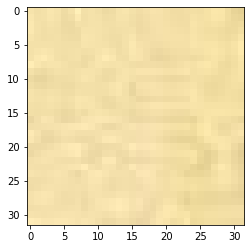

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph2, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

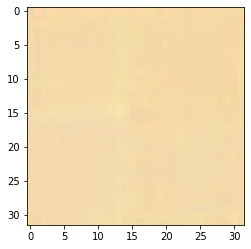

In [ ]:
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)

# print(AE_test_ph12)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph2 = encoder_bottleneck.predict(np_AE_image_crop_test_ph2_norm)
print(bottleneck_ph2)

[[-0.30328435  0.39650682]]


### (testing) AE Decode Image

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg")

AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_10.jpg")

AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_10.jpg")

(1, 32, 32, 3)


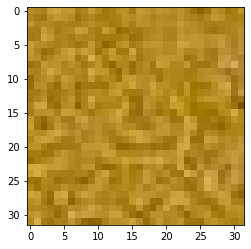

In [ ]:
plt.imshow(AE_image_crop_test_ph12)

# img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
# np_AE_image_crop_test_ph12 = np.array(img)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
np_AE_image_crop_test_ph12 = np.array(img)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

(1, 32, 32, 3)


In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

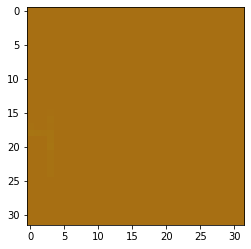

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

(1, 32, 32, 3)


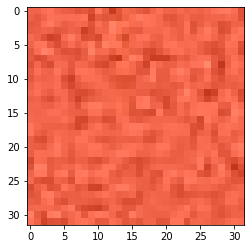

In [ ]:
plt.imshow(AE_image_crop_test_ph2)
# img = cv2.imread("/content/gdrive/MyDrive/NCHU/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56_56/2/ph2_10.jpg")
# res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph2.shape)

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)
AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)
AE_test_ph12.shape
AE_test_ph2.shape

(1, 32, 32, 3)

In [ ]:
aa = ( AE_test_ph12 - np.min(AE_test_ph12) ) * 255 / ( np.max(AE_test_ph12) - np.min(AE_test_ph12) )

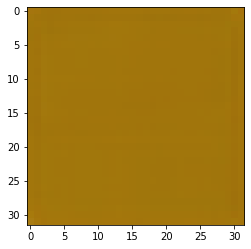

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
plt.imshow(AE_test_ph12)
# plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

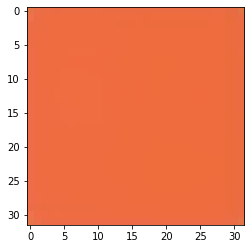

In [ ]:
# print(AE_test_2)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
plt.imshow(AE_test_ph2)
# plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
train_X_2.shape

(4696, 32, 32, 3)

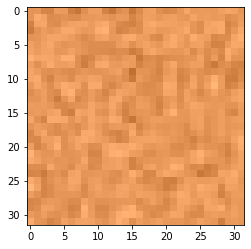

In [ ]:
plt.imshow(train_X_2[0])

In [ ]:
train_np_ds.shape

(4696, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


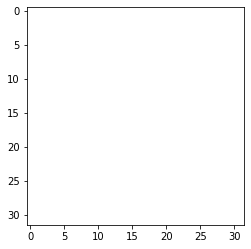

In [ ]:
plt.imshow(train_np_ds[0])

### AE Classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [9]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[4]
 [9]
 [3]
 [1]
 [1]
 [0]
 [0]
 [0]
 [4]
 [2]]


In [ ]:
num_classes = 11
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

# activation='softmax' activation='sigmoid

In [ ]:
batch_size = 32
epochs = 30
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

In [ ]:
encode = encoder_bottleneck(input_img)
full_model = Model(input_img, fc(encode))

(None, 11)


In [ ]:
encode.shape

TensorShape([None, 2])

In [ ]:
# full_model.compile(optimizer='adam',
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])


# compile model
full_model.compile(loss = keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4) ,metrics=['accuracy'])

In [ ]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_1 (Functional)        (None, 2)                 95682     
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 11)                1419      
                                                                 
Total params: 97,485
Trainable params: 96,781
Non-trainable params: 704
_________________________________________________________________


In [ ]:
history_classify = full_model.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
115/115 [==============================] - 2s 10ms/step - loss: 0.0748 - accuracy: 0.2167 - val_loss: 0.0816 - val_accuracy: 0.1071
Epoch 2/100
115/115 [==============================] - 1s 7ms/step - loss: 0.0666 - accuracy: 0.3088 - val_loss: 0.0786 - val_accuracy: 0.1989
Epoch 3/100
115/115 [==============================] - 1s 7ms/step - loss: 0.0626 - accuracy: 0.3556 - val_loss: 0.0740 - val_accuracy: 0.2000
Epoch 4/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0591 - accuracy: 0.4280 - val_loss: 0.0929 - val_accuracy: 0.2732
Epoch 5/100
115/115 [==============================] - 1s 7ms/step - loss: 0.0555 - accuracy: 0.4832 - val_loss: 0.0990 - val_accuracy: 0.1978
Epoch 6/100
115/115 [==============================] - 1s 7ms/step - loss: 0.0530 - accuracy: 0.5092 - val_loss: 0.0654 - val_accuracy: 0.3432
Epoch 7/100
115/115 [==============================] - 1s 7ms/step - loss: 0.0505 - accuracy: 0.5441 - val_loss: 0.0568 - val_accuracy: 0.414

### Save classifier model

In [ ]:
full_model.save("/content/LPE_AE_2_FC.h5")
files.download('/content/LPE_AE_2_FC.h5')

joblib.dump(history_classify, '/content/LPE_AE_FC_train_history_2')
files.download('/content/LPE_AE_FC_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE classifier model

In [11]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_AE_2_FC.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_AE_FC_train_history_2')

# full_model = load_model('/content/LPE_AE_2_FC.h5')
# history_classify = joblib.load('/content/LPE_AE_FC_train_history_2')

### Evaluate classifier model

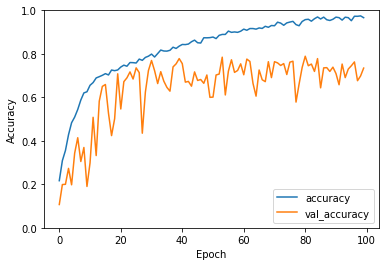

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.0368
Test accuracy: 0.7212


In [ ]:
test_eval = full_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.0368
Test accuracy: 0.7212


In [ ]:
pre_img_test = full_model.predict(test_X)
pre_img_train = full_model.predict(train_X)

In [ ]:
test_X.shape

(1144, 32, 32, 3)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[5.6834784e-07 1.7731771e-06 2.0802700e-05 6.7717181e-08 1.7561452e-07
 1.9231564e-08 3.5613652e-05 5.6484598e-01 4.3367153e-01 1.0002084e-03
 4.2322057e-04]
0.564846
7
0.9999999


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(1144,)

In [ ]:
pre_img[4], test_y[4]

(2, array([2]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[107   0   0   0   0   0   0   0   0   0   0]
 [  7  69  14   0   2   0   0   0   0   0   0]
 [  0  36  48   1   0   0   0   0   0   1   0]
 [  4  32   1  43  18   0   0   0   0   0   0]
 [  9  11   0  18  44   8   0   0   0   0   0]
 [  0   0   0   0   7 179   0   0   0   0   0]
 [ 11   0   0   0   0   2  60  17   0   0   0]
 [  5   0   0   0   0   0   1  35  64   5   1]
 [  0   0   0   0   0   0   0   1  39  48   0]
 [  1   0   0   0   0   0   0   0   3  96   0]
 [  0   0   0   0   0   0   0   0   0   0  96]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       107
           1       0.47      0.75      0.57        92
           2       0.76      0.56      0.64        86
           3       0.69      0.44      0.54        98
           4       0.62      0.49      0.55        90
           5       0.95      0.96      0.95       186
           6       0.98      0.67      0.79        90
           7       0.66      0.32      0.43      

Text(33.0, 0.5, 'True Label')

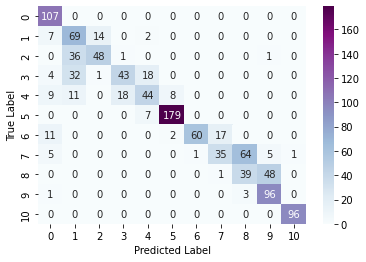

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### AE_2dim_plot

In [12]:
encoded_data = encoder_bottleneck.predict(test_X)
encoded_data.shape

(1144, 2)

In [13]:
encoded_data_pred_2 = pd.DataFrame(data = encoded_data
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2['label'] = test_y + 2

In [14]:
encoded_data_pred_2.head()

,principal component 1,principal component 2,label
0,11.765176,0.906440,5
1,9.605318,-11.072543,7
2,0.035681,-7.668015,9
3,-35.685032,-15.240926,12
4,6.744386,2.263286,3


In [76]:
encoded_data_pred_2_normilize = (encoded_data_pred_2.iloc[:,:-1] - np.min(encoded_data_pred_2.iloc[:,:-1])) / (np.max(encoded_data_pred_2.iloc[:,:-1]) - np.min(encoded_data_pred_2.iloc[:,:-1])) * 100

In [77]:
encoded_data_pred_2_norm = pd.DataFrame(data = encoded_data_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2_norm['label'] = test_y + 2

In [78]:
encoded_data_pred_2_norm

,principal component 1,principal component 2,label
0,86.668839,65.819099,5
1,82.984512,43.834614,7
2,66.660439,50.082790,9
3,5.727339,36.184578,12
4,78.104279,68.309250,3
...,...,...,...
1139,81.225700,50.231880,7
1140,68.016403,10.725257,2
1141,54.802090,71.829567,9
1142,84.841469,71.486931,3


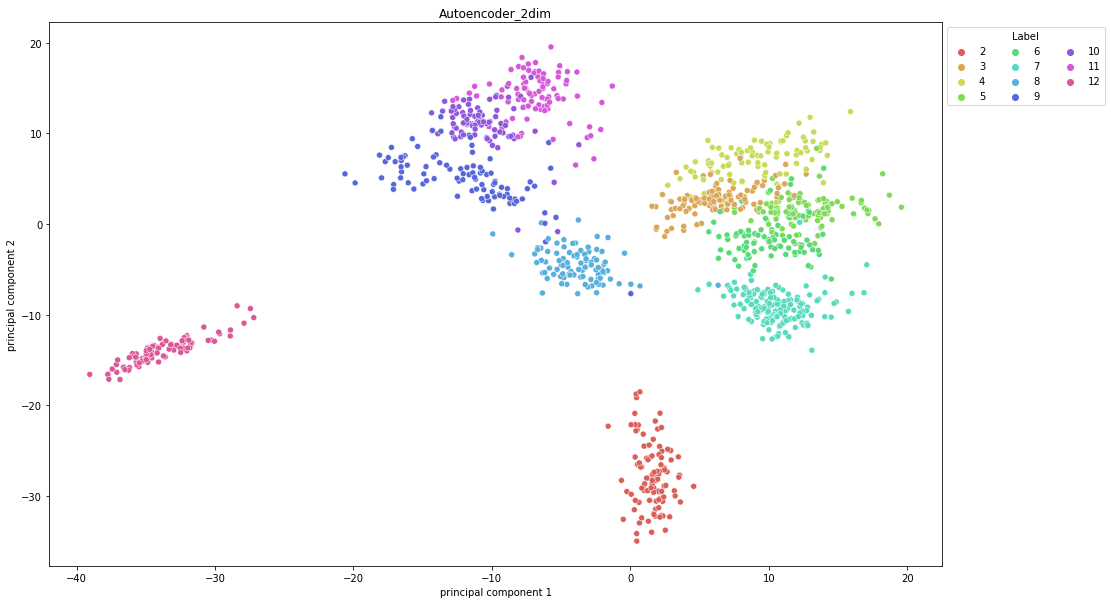

In [15]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= encoded_data_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### AE_mean plot

In [16]:
encoded_data_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,11.765176,0.906440
1,9.605318,-11.072543
2,0.035681,-7.668015
3,-35.685032,-15.240926
4,6.744386,2.263286
...,...,...
1139,8.574251,-7.586779
1140,0.830589,-29.113293
1141,-6.916020,4.181445
1142,10.693919,3.994752


In [17]:
encoded_data_pred_2.iloc[:,2:3]

,label
0,5
1,7
2,9
3,12
4,3
...,...
1139,7
1140,2
1141,9
1142,3


In [127]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(encoded_data_pred_2), np.array(encoded_data_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [94]:
# class2

In [128]:
number_of_elements = len(class2)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  101


In [129]:
mean_x_AE = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_AE)

[1.583303187300663, 6.181247841893581, 9.205714266787293, 12.747340901692708, 10.130727366967635, 10.516567954803978, -3.8122991335235143, -11.923481309459996, -10.651388339435353, -6.83702512069415, -33.81332829658022]


In [130]:
mean_y_AE = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_AE)

[-27.73502527369131, 2.696905605494976, 7.100559126946234, 1.5825844891724132, -1.4371643289923668, -8.965690939120075, -4.507166288400951, 5.125705308904967, 11.082471435210284, 14.100073973337809, -13.991512227565684]


In [131]:
mean_ph_AE = pd.DataFrame(data = zip(mean_x_AE, mean_y_AE)
             , columns = ['principal component 1', 'principal component 2'])
mean_ph_AE['label'] = mean_ph_AE.index + 2

print(round(mean_ph_AE, 4))

    principal component 1  principal component 2  label
0                  1.5833               -27.7350      2
1                  6.1812                 2.6969      3
2                  9.2057                 7.1006      4
3                 12.7473                 1.5826      5
4                 10.1307                -1.4372      6
5                 10.5166                -8.9657      7
6                 -3.8123                -4.5072      8
7                -11.9235                 5.1257      9
8                -10.6514                11.0825     10
9                 -6.8370                14.1001     11
10               -33.8133               -13.9915     12


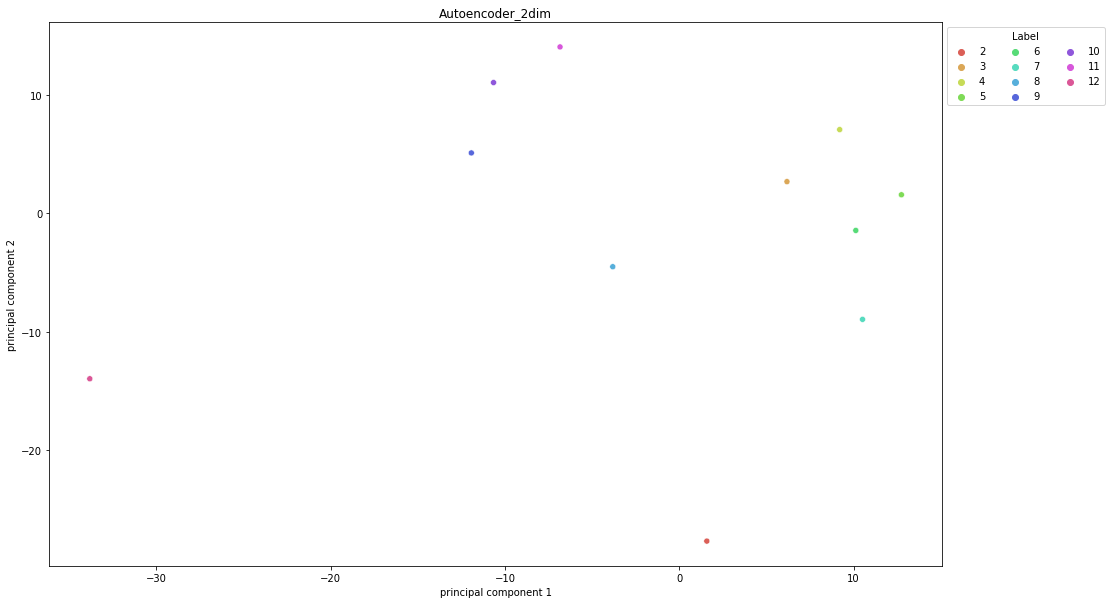

In [132]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= mean_ph_AE,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & within class

In [133]:
mean_XX_AE = np.mean(mean_x_AE)
print(mean_XX_AE)

mean_YY_AE = np.mean(mean_y_AE)
print(mean_YY_AE)

-1.5156927891133976
-1.3589326471548822


In [134]:
class_feature_means_AE = pd.DataFrame()
for c, rows in encoded_data_pred_2.groupby('label'):
    class_feature_means_AE[c] = rows.mean()
class_feature_means_AE

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,1.583303,6.181248,9.205714,12.747340,10.130727,10.516568,-3.812300,-11.923483,-10.651387,-6.837026,-33.813332
principal component 2,-27.735018,2.696906,7.100561,1.582585,-1.437164,-8.965690,-4.507166,5.125705,11.082474,14.100073,-13.991512
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [135]:
aa = class_feature_means_AE.iloc[:1,:] - mean_XX_AE
bb = class_feature_means_AE.iloc[1:2,:] - mean_YY_AE

In [136]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [137]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_AE = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_AE)) 

15.6349


In [138]:
all_class_AE = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_AE[m]):

    sum += np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2))
    print(x, y, np.array(class_feature_means_AE.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  print(i+1)
  print(sum)

within_class_AE = sum2/11
print("{:.4f}".format(within_class_AE)) 


 ph  2
3.613267183303833 -30.648332595825195 [  1.58330345 -27.73501778]
2.247929334640503 -32.12593460083008 [  1.58330345 -27.73501778]
1.3053523302078247 -32.763427734375 [  1.58330345 -27.73501778]
0.9320679903030396 -28.959312438964844 [  1.58330345 -27.73501778]
2.459080696105957 -26.929746627807617 [  1.58330345 -27.73501778]
2.0446066856384277 -29.527843475341797 [  1.58330345 -27.73501778]
2.4385242462158203 -28.88105583190918 [  1.58330345 -27.73501778]
1.0388669967651367 -28.63801383972168 [  1.58330345 -27.73501778]
3.4684510231018066 -25.67451286315918 [  1.58330345 -27.73501778]
2.0266048908233643 -29.442848205566406 [  1.58330345 -27.73501778]
2.1197762489318848 -24.521808624267578 [  1.58330345 -27.73501778]
1.8204113245010376 -31.43918228149414 [  1.58330345 -27.73501778]
1.6942569017410278 -29.060497283935547 [  1.58330345 -27.73501778]
0.45307040214538574 -19.139297485351562 [  1.58330345 -27.73501778]
0.9320789575576782 -23.164339065551758 [  1.58330345 -27.7350177

In [139]:
print("{:.4f}".format(within_class_AE)) 

2.6859


In [140]:
print("{:.4f}".format(between_class_AE / within_class_AE)) 

5.8210


## PCA

In [33]:
import pandas as pd
from sklearn.decomposition import PCA

### verify train data

In [ ]:
print('Traning data shape:', train_X.shape)
print('Testing data shape:', test_X.shape)

Traning data shape: (4574, 32, 32, 3)
Testing data shape: (1144, 32, 32, 3)


In [ ]:
train_y.shape, test_y.shape

((4574, 1), (1144, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
label_dict = {
 0: 'PH2',
 1: 'PH3',
 2: 'PH4',
 3: 'PH5',
 4: 'PH6',
 5: 'PH7',
 6: 'PH8',
 7: 'PH9',
 8: 'PH10',
 9: 'PH11',
 10: 'PH12',
}

Text(0.5, 1.0, '(Label: PH11)')
Text(0.5, 1.0, '(Label: PH4)')


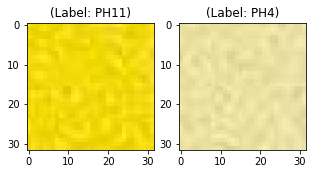

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X[0], (32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[train_y[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_X[0],(32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[test_y[0][0]]) + ")"))

### Data Preprocessing


In [34]:
np.min(train_X),np.max(train_X)
np.min(test_X),np.max(test_X)

(0.0, 1.0)

In [35]:
x_train = train_X/255.0
np.min(x_train),np.max(x_train)

x_test = test_X/255.0
np.min(x_test),np.max(x_test)

(0.0, 0.003921569)

In [36]:
x_train.shape, x_test.shape

((4574, 32, 32, 3), (1144, 32, 32, 3))

In [37]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)
x_train_flat.shape, x_test_flat.shape

((4574, 3072), (1144, 3072))

In [38]:
feat_cols_train = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

In [39]:
df_dataset_train = pd.DataFrame(x_train_flat, columns=feat_cols_train)
df_dataset_test = pd.DataFrame(x_test_flat, columns=feat_cols_test)

In [40]:
df_dataset_train['label'] = train_y
print('Size of the dataframe: {}'.format(df_dataset_train.shape))

df_dataset_test['label'] = test_y
print('Size of the dataframe: {}'.format(df_dataset_test.shape))

Size of the dataframe: (4574, 3073)
Size of the dataframe: (1144, 3073)


In [41]:
# df_dataset_train.head()
df_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.002276,0.003368,0.003522,0.002245,0.003337,0.003491,0.002276,0.003368,0.003522,0.002368,...,0.002322,0.003429,0.003583,0.002307,0.003460,0.003599,0.002307,0.003460,0.003599,3
1,0.001569,0.003260,0.003445,0.001815,0.003506,0.003691,0.001646,0.003337,0.003522,0.001446,...,0.001907,0.003568,0.003752,0.001553,0.003245,0.003429,0.001553,0.003245,0.003429,5
2,0.001661,0.003537,0.003752,0.001599,0.003476,0.003691,0.001615,0.003506,0.003722,0.001599,...,0.001876,0.003645,0.003845,0.001769,0.003537,0.003737,0.001615,0.003383,0.003583,7
3,0.000031,0.003260,0.003814,0.000031,0.003260,0.003814,0.000046,0.003276,0.003829,0.000092,...,0.000077,0.003337,0.003875,0.000154,0.003414,0.003922,0.000169,0.003429,0.003922,10
4,0.002338,0.003445,0.003629,0.002230,0.003337,0.003522,0.002261,0.003368,0.003552,0.002445,...,0.002322,0.003460,0.003645,0.002338,0.003476,0.003660,0.002399,0.003537,0.003722,1


In [42]:
df_dataset_test.shape

(1144, 3073)

### PCA fit transform

In [43]:
df_dataset_train.iloc[:,:-1].shape

(4574, 3072)

In [44]:
pca_dataset_train_2 = PCA(n_components=2)
# pca_dataset_train_2.fit(df_dataset_train.iloc[:,:-1])
pca_dataset_train_2.fit(x_train_flat)
# principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(df_dataset_test.iloc[:,:-1])
principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(x_test_flat)

In [45]:
principalComponents_ds_test_pred_2.shape

(1144, 2)

In [46]:
principal_ds_Df_pred_2 = pd.DataFrame(data = principalComponents_ds_test_pred_2
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2['label'] = test_y + 2

In [47]:
principal_ds_Df_pred_2.head()

,principal component 1,principal component 2,label
0,-0.025091,-0.000301,5
1,-0.005897,-0.001717,7
2,-0.002031,-0.000273,9
3,0.048938,0.004245,12
4,-0.023513,0.000297,3


In [48]:
principal_ds_Df_pred_2.shape

(1144, 3)

In [49]:
principal_ds_Df_pred_2_normilize = (principal_ds_Df_pred_2.iloc[:,:-1] - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) / (np.max(principal_ds_Df_pred_2.iloc[:,:-1]) - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) * 100

In [50]:
principal_ds_Df_pred_2_norm = pd.DataFrame(data = principal_ds_Df_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2_norm['label'] = test_y + 2

In [51]:
principal_ds_Df_pred_2_norm

,principal component 1,principal component 2,label
0,17.569288,46.359928,5
1,38.563873,32.756355,7
2,42.792198,46.628399,9
3,98.541573,90.013062,12
4,19.295116,52.100224,3
...,...,...,...
1139,43.152569,30.034882,7
1140,5.324130,81.682014,2
1141,74.365150,30.432850,9
1142,16.603659,45.942711,3


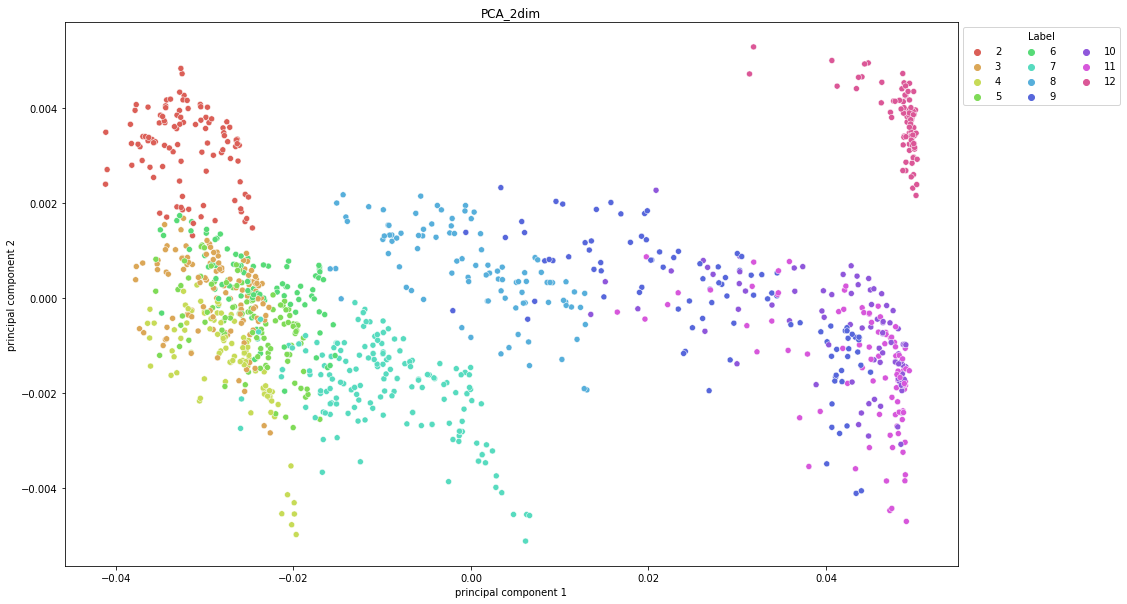

In [52]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
)
ax.set(title='PCA_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

[Text(0.5, 1.0, 'PCA_train_2dim')]

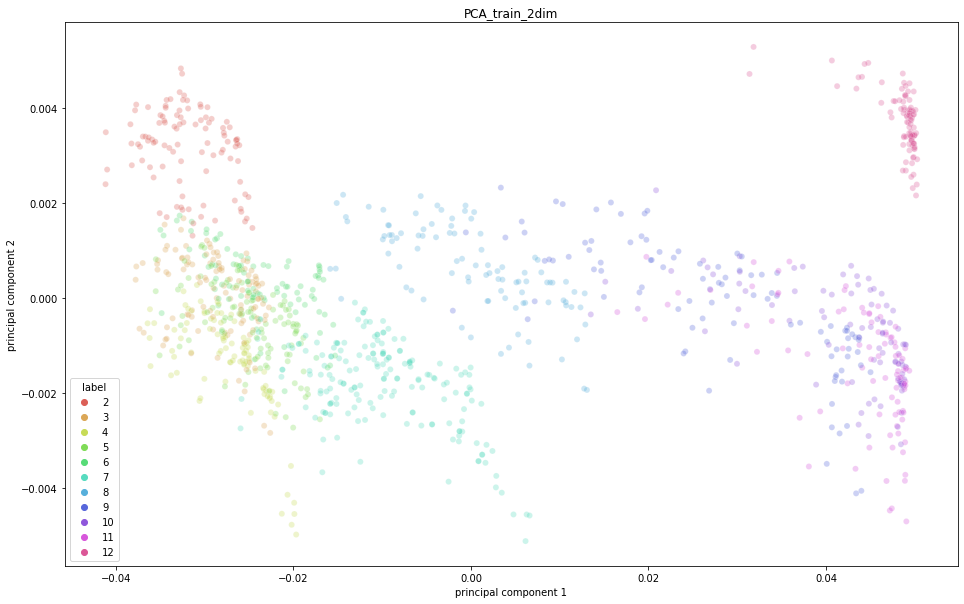

In [53]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
    alpha=0.3,
).set(title='PCA_train_2dim')


有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [54]:
print("各主成分方向：\n",pca_dataset_train_2.components_.shape)
print('Explained variation per principal component: {}'.format(pca_dataset_train_2.explained_variance_ratio_))
print(format(pca_dataset_train_2.explained_variance_))
print(format(pca_dataset_train_2.singular_values_))

各主成分方向：
 (2, 3072)
Explained variation per principal component: [0.9645189  0.00427563]
[9.2742353e-04 4.1111862e-06]
[2.059395   0.13711475]


### PCA_mean plot

In [55]:
principal_ds_Df_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-0.025091,-0.000301
1,-0.005897,-0.001717
2,-0.002031,-0.000273
3,0.048938,0.004245
4,-0.023513,0.000297
...,...,...
1139,-0.001702,-0.002001
1140,-0.036286,0.003378
1141,0.026834,-0.001959
1142,-0.025974,-0.000344


In [56]:
principal_ds_Df_pred_2.iloc[:,2:3]

,label
0,5
1,7
2,9
3,12
4,3
...,...
1139,7
1140,2
1141,9
1142,3


In [141]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(principal_ds_Df_pred_2.iloc[:,:-1]), np.array(principal_ds_Df_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [142]:
# class12

In [143]:
number_of_elements = len(class2)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  101


In [144]:
mean_x_PCA = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_PCA)

[-0.03193978437840348, -0.0286192862447678, -0.02714589376363062, -0.024800591880366915, -0.02380907334471968, -0.009671733841481626, 6.468458917592406e-05, 0.02716890499763882, 0.04167745817890939, 0.04345830479857101, 0.04844272152540532]


In [145]:
mean_XX_PCA = np.mean(mean_x_PCA)
print(mean_XX_PCA)

0.0013477918760300299


In [146]:
mean_y_PCA = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_PCA)

[0.0031515995425513326, 6.991237926724767e-05, -0.0013832436839772027, -0.0005479797374088473, 0.00024160980871618614, -0.0018491555390978368, 0.0005832313984635556, -0.00011870879547900914, -0.0007732070605818401, -0.0014684897976093775, 0.0037213229658478435]


In [147]:
mean_YY_PCA = np.mean(mean_y_PCA)
print(mean_YY_PCA)

0.00014789922551745925


In [148]:
PCA_mean_ph = pd.DataFrame(data = zip(mean_x_PCA, mean_y_PCA)
             , columns = ['principal component 1', 'principal component 2'])
PCA_mean_ph['label'] = PCA_mean_ph.index + 2

print(round(PCA_mean_ph, 4))

    principal component 1  principal component 2  label
0                 -0.0319                 0.0032      2
1                 -0.0286                 0.0001      3
2                 -0.0271                -0.0014      4
3                 -0.0248                -0.0005      5
4                 -0.0238                 0.0002      6
5                 -0.0097                -0.0018      7
6                  0.0001                 0.0006      8
7                  0.0272                -0.0001      9
8                  0.0417                -0.0008     10
9                  0.0435                -0.0015     11
10                 0.0484                 0.0037     12


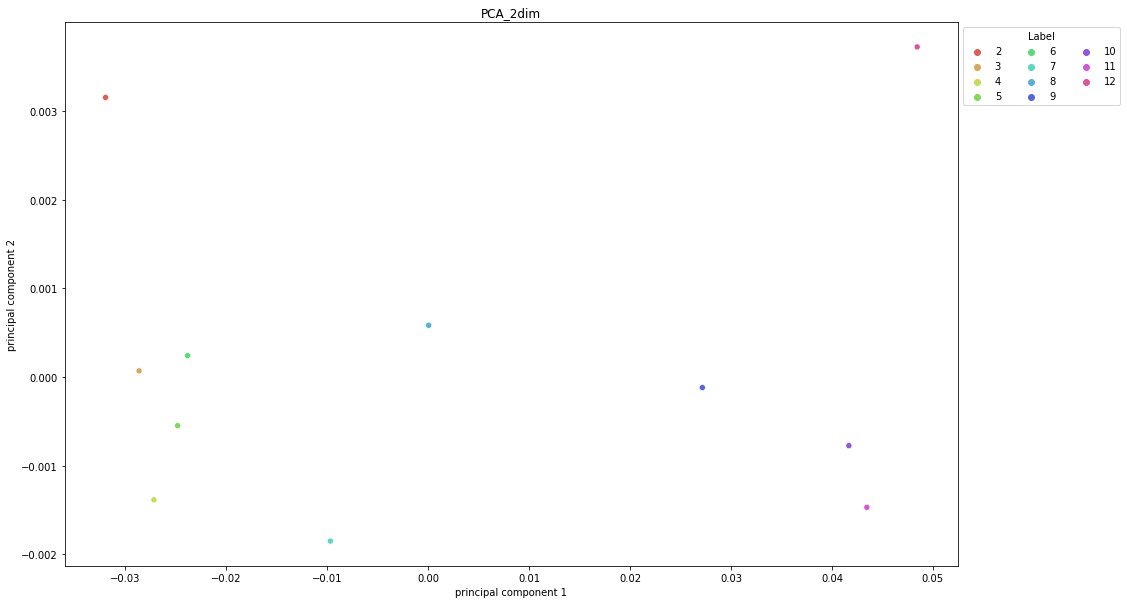

In [149]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= PCA_mean_ph,
    legend="full",
)
ax.set(title='PCA_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [65]:
principal_ds_Df_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-0.025091,-0.000301,5
1,-0.005897,-0.001717,7
2,-0.002031,-0.000273,9
3,0.048938,0.004245,12
4,-0.023513,0.000297,3
...,...,...,...
1139,-0.001702,-0.002001,7
1140,-0.036286,0.003378,2
1141,0.026834,-0.001959,9
1142,-0.025974,-0.000344,3


In [150]:
class_feature_means_PCA = pd.DataFrame()
for c, rows in principal_ds_Df_pred_2.groupby('label'):
    class_feature_means_PCA[c] = rows.mean()
class_feature_means_PCA

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.031940,-0.028619,-0.027146,-0.024801,-0.023809,-0.009672,0.000065,0.027169,0.041677,0.043458,0.048443
principal component 2,0.003152,0.000070,-0.001383,-0.000548,0.000242,-0.001849,0.000583,-0.000119,-0.000773,-0.001468,0.003721
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [151]:
class_feature_means_PCA.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.031940,-0.028619,-0.027146,-0.024801,-0.023809,-0.009672,0.000065,0.027169,0.041677,0.043458,0.048443
principal component 2,0.003152,0.000070,-0.001383,-0.000548,0.000242,-0.001849,0.000583,-0.000119,-0.000773,-0.001468,0.003721


In [152]:
print(mean_XX_PCA, mean_YY_PCA)

0.0013477918760300299 0.00014789922551745925


In [153]:
aa = class_feature_means_PCA.iloc[:1,:] - mean_XX_PCA
bb = class_feature_means_PCA.iloc[1:2,:] - mean_YY_PCA

In [154]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,0.003004,-0.000078,-0.001531,-0.000696,0.000094,-0.001997,0.000435,-0.000267,-0.000921,-0.001616,0.003573


In [155]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [156]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_PCA = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_PCA)) 

0.0283


In [157]:
all_class_PCA = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_PCA[m]):

    sum += np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2))
    print(x, y, np.array(class_feature_means_PCA.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  print(i+1)
  print(sum)

within_class_PCA = sum2/11
print("{:.4f}".format(within_class_PCA)) 


 ph  2
-0.03590005 0.0033336654 [-0.03193978  0.0031516 ]
-0.028089762 0.003057893 [-0.03193978  0.0031516 ]
-0.030481758 0.0040745535 [-0.03193978  0.0031516 ]
-0.032303613 0.0042630723 [-0.03193978  0.0031516 ]
-0.03438632 0.0040439772 [-0.03193978  0.0031516 ]
-0.031850353 0.0039872928 [-0.03193978  0.0031516 ]
-0.032823075 0.003945719 [-0.03193978  0.0031516 ]
-0.026313474 0.003342138 [-0.03193978  0.0031516 ]
-0.02644993 0.0033194518 [-0.03193978  0.0031516 ]
-0.032379214 0.003695213 [-0.03193978  0.0031516 ]
-0.032644093 0.0028762177 [-0.03193978  0.0031516 ]
-0.029670155 0.0032595308 [-0.03193978  0.0031516 ]
-0.03835073 0.0036548171 [-0.03193978  0.0031516 ]
-0.0303886 0.0017046394 [-0.03193978  0.0031516 ]
-0.03178213 0.0018641003 [-0.03193978  0.0031516 ]
-0.034509785 0.0032106433 [-0.03193978  0.0031516 ]
-0.03726857 0.0031819423 [-0.03193978  0.0031516 ]
-0.029844299 0.0038012601 [-0.03193978  0.0031516 ]
-0.02881395 0.0016248149 [-0.03193978  0.0031516 ]
-0.027919086 0.00

In [158]:
print("{:.4f}".format(within_class_PCA)) 

0.0051


In [159]:
print("{:.4f}".format(between_class_PCA / within_class_PCA)) 

5.5106


### PCA classifer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [ ]:
x_train_flat.shape, x_test_flat.shape

((4574, 3072), (1144, 3072))

In [ ]:
pca_train = PCA(2)
pca_train.fit(x_train_flat)
train_img_pca = pca_train.transform(x_train_flat)

pca_test = PCA(2)
pca_test.fit(x_test_flat)
test_img_pca = pca_train.transform(x_test_flat)

In [ ]:
train_img_pca.shape, test_img_pca.shape

((4574, 2), (1144, 2))

In [ ]:
y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [9]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[4]
 [9]
 [3]
 [1]
 [1]
 [0]
 [0]
 [0]
 [4]
 [2]]


In [ ]:
num_classes = 11
def fc(enco):
    
    print(f'enco : {enco}')
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

In [ ]:
input_img = Input(shape = (2))
full_model = Model(input_img, fc(input_img))
full_model.summary()

enco : KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
(None, 11)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 11)                1419      
                                                                 
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
full_model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-1) ,metrics=['accuracy'])

In [ ]:
history_classify = full_model.fit(train_img_pca, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
115/115 [==============================] - 1s 6ms/step - loss: 1.8337 - accuracy: 0.2785 - val_loss: 1.4936 - val_accuracy: 0.3716
Epoch 2/100
115/115 [==============================] - 0s 4ms/step - loss: 1.3330 - accuracy: 0.4671 - val_loss: 1.1172 - val_accuracy: 0.5388
Epoch 3/100
115/115 [==============================] - 0s 4ms/step - loss: 1.0412 - accuracy: 0.5709 - val_loss: 0.8700 - val_accuracy: 0.6634
Epoch 4/100
115/115 [==============================] - 0s 4ms/step - loss: 0.9014 - accuracy: 0.6198 - val_loss: 0.9255 - val_accuracy: 0.5792
Epoch 5/100
115/115 [==============================] - 1s 5ms/step - loss: 0.8432 - accuracy: 0.6390 - val_loss: 0.9114 - val_accuracy: 0.6131
Epoch 6/100
115/115 [==============================] - 1s 5ms/step - loss: 0.8565 - accuracy: 0.6267 - val_loss: 0.7624 - val_accuracy: 0.6689
Epoch 7/100
115/115 [==============================] - 1s 4ms/step - loss: 0.8105 - accuracy: 0.6644 - val_loss: 0.8082 - val_accuracy: 0.6492

### Save model

In [ ]:
from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
full_model.save("/content/LPE_PCA_2.h5")
files.download('/content/LPE_PCA_2.h5')

joblib.dump(history_classify, '/content/LPE_PCA_train_history_2')
files.download('/content/LPE_PCA_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### load PCA classfier model

In [ ]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_PCA_2.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_Model/0926/LPE_PCA_train_history_2')

### Evaluate classify Model

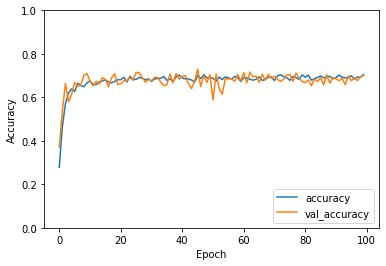

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_img_pca, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.6429
Test accuracy: 0.7238


In [ ]:
pre_img_test = full_model.predict(test_img_pca)
pre_img_train = full_model.predict(train_img_pca)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[1.5219999e-31 6.8447702e-24 0.0000000e+00 6.7891407e-18 2.3994268e-22
 0.0000000e+00 1.6311000e-04 3.5661298e-01 1.1203434e-01 5.3118962e-01
 7.0705156e-15]
0.5311896
9
1.0


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(1144,)

In [ ]:
pre_img[0], test_y[0]

(9, array([7]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[107   0   0   0   0   0   0   0   0   0   0]
 [ 38  32  22   0   0   0   0   0   0   0   0]
 [ 11   1  74   0   0   0   0   0   0   0   0]
 [ 53  20  15   0   6   4   0   0   0   0   0]
 [ 31  11   3   0  41   4   0   0   0   0   0]
 [ 16   0   4   0   0 166   0   0   0   0   0]
 [  0   0   0   0   0   3  87   0   0   0   0]
 [ 19   0   0   0   0   0  10  64  14   4   0]
 [ 14   0   0   0   0   0   1  10  55   8   0]
 [ 22   0   0   0   0   0   1  10  33  34   0]
 [  0   0   0   0   0   0   0   0   0   0  96]]
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       107
           1       0.50      0.35      0.41        92
           2       0.63      0.86      0.73        86
           3       0.00      0.00      0.00        98
           4       0.87      0.46      0.60        90
           5       0.94      0.89      0.91       186
           6       0.88      0.97      0.92        90
           7       0.76      0.58      0.66      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'True Label')

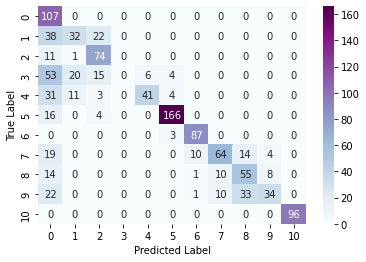

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')